In [1]:
# S2 signal script
import sys
sys.path.append('/home/investigator/mariandbt/python/notebooks/modules')

from import_modules import *

import set_up as setup
import s2_signal as s2sig


In [2]:
def delta_dirac(x, x0):
    return np.where((x - x0) == 0, 1, 0)

In [90]:
# Parameters
q_1pe = 1  # Charge corresponding to 1 SPE in V*ns
tau = 20   # Decay time constant in ns
rise_time = 1  # Rise time constant in ns

def sipm_response(charge_in_pes, t_in_ns, t0):
    
    rise_term = np.exp(t0 / (tau * rise_time)) - np.exp(-(t_in_ns - t0) / (tau * rise_time))
    decay_term = np.exp(-(t_in_ns - t0) / tau)
    
    signal = (rise_term * decay_term)
    signal_area = signal.sum()
    
    normalized_signal = charge_in_pes*signal/signal_area
    
    sens_response = np.where(t > t0, normalized_signal, 0)
    
    return normalized_signal

In [93]:
n_ie = int(1e4)
charge = np.random.poisson(1, n_ie)
t = np.linspace(0, 1000, n_ie)
t0 = 4000
# t_shift = -400

/tmp/ipykernel_292264/2184097105.py:1: RuntimeWarning: overflow encountered in exp
  rise_term = np.exp(t0) - np.exp(-(t - t0) / (tau * rise_time))


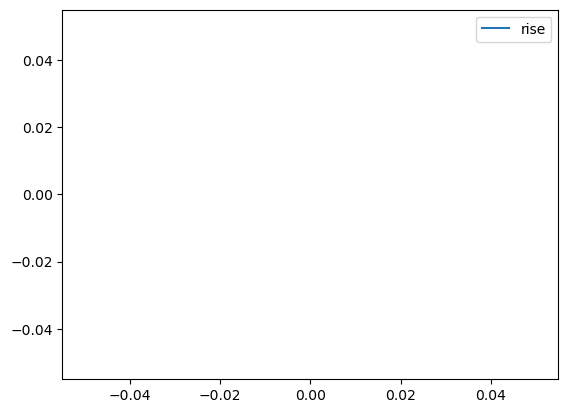

In [94]:

rise_term = np.exp(t0) - np.exp(-(t - t0) / (tau * rise_time))
decay_term = np.exp(-(t - t0) / tau)

plt.plot(t, rise_term, label = 'rise')
# plt.plot(t, decay_term, label = 'decay')

plt.legend()

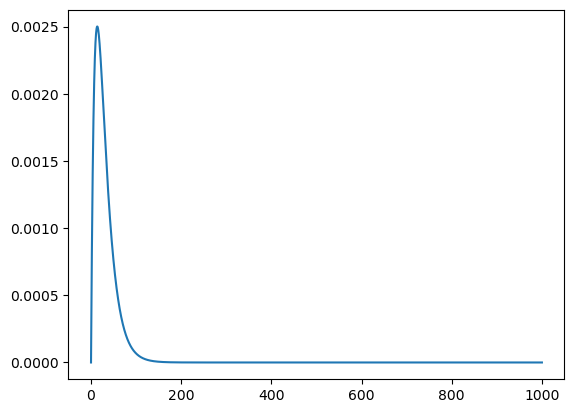

In [95]:
plt.plot(t, sipm_response(1, t, t0))
# plt.plot(np.linspace(0, 100, n_ie), sipm_response(1, np.linspace(0, 100, n_ie)))


In [6]:
np.where(charge > 1)

(array([   0,    2,    3, ..., 9985, 9994, 9998]),)

In [7]:
np.sum(sipm_response(2, t))

2.0000000000000004

In [8]:
np.where(charge==1)[0][-100]

9743

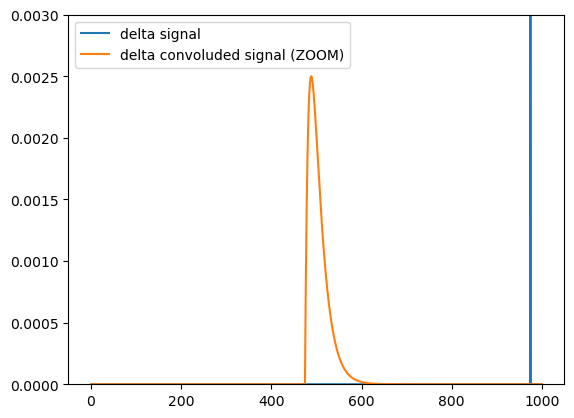

In [11]:
selected_t = t[9743]

deltas = charge*delta_dirac(t, selected_t)

total_charge = deltas.sum()
response = sipm_response(total_charge, t)

convolution = np.convolve(deltas, response, mode='same') / np.sum(response)


plt.plot(t,deltas, label = 'delta signal')
plt.plot(t,convolution, label = 'delta convoluded signal (ZOOM)')

plt.ylim(0, 0.003)

plt.legend()

In [12]:
deltas_wvf = np.zeros_like(t)
convoluded_wvf = np.zeros_like(t)

for selected_t in t:
    
    deltas = charge*delta_dirac(t, selected_t)
    
    
    total_charge = deltas.sum()
    response = sipm_response(total_charge, t)

    convolution = np.convolve(deltas, response, mode='same') / np.sum(response)
    
    deltas_wvf = deltas_wvf + deltas
    convoluded_wvf = convoluded_wvf + convolution
    
    

/tmp/ipykernel_292264/1269914037.py:12: RuntimeWarning: invalid value encountered in true_divide
  convolution = np.convolve(deltas, response, mode='same') / np.sum(response)


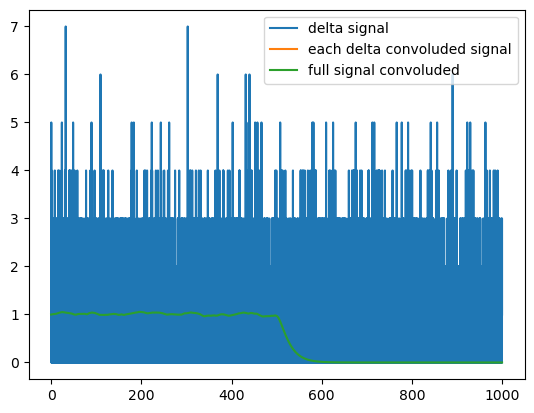

In [13]:

total_charge = charge.sum()
response = sipm_response(total_charge, t)

full_wvf_conv = np.convolve(charge, response, mode='same') / np.sum(response)

plt.plot(t,deltas_wvf, label = 'delta signal')
plt.plot(t,convoluded_wvf, label = 'each delta convoluded signal')
plt.plot(t,full_wvf_conv, label = 'full signal convoluded')

plt.legend()

In [150]:
full_wvf_conv - convoluded_wvf

array([ 3.33066907e-16,  2.22044605e-16,  1.11022302e-16, ...,
        0.00000000e+00,  0.00000000e+00, -1.29246971e-26])

In [151]:
full_wvf_conv[np.fabs(full_wvf_conv - convoluded_wvf) > 1e-10]

array([], dtype=float64)

In [115]:
convoluded_wvf

array([0.92742299, 0.95593684, 0.98071309, 1.00215999, 1.01584952,
       1.02760218, 1.03284003, 1.03724888, 1.03612979, 1.03505989,
       1.03403732, 1.02826564, 1.02802914, 1.02775607, 1.02745287,
       1.02712521, 1.02677809, 1.02641587, 1.03083704, 1.03455351,
       1.03285213, 1.03129733, 1.02987584, 1.02857565, 1.03218051,
       1.03518908, 1.03767097, 1.03489383, 1.0276102 , 1.02607742,
       1.01990493, 1.01456888, 1.00997693, 1.01084084, 1.02118409,
       1.04441965, 1.06424102, 1.08582909, 1.09924402, 1.12475003,
       1.15093717, 1.16799649, 1.18671988, 1.20199014, 1.20942587,
       1.2244773 , 1.2364132 , 1.24561511, 1.25242389, 1.25714377,
       1.25525147, 1.25117673, 1.24228064, 1.22934596, 1.21176104,
       1.19150355, 1.16650093, 1.14126067, 1.11416882, 1.08561388,
       1.05398145, 1.02357593, 0.99195013, 0.96066596, 0.92793099,
       0.89658545, 0.8647527 , 0.8332408 , 0.80215376, 0.77223067,
       0.74090532, 0.71224513, 0.68424419, 0.65629057, 0.62975

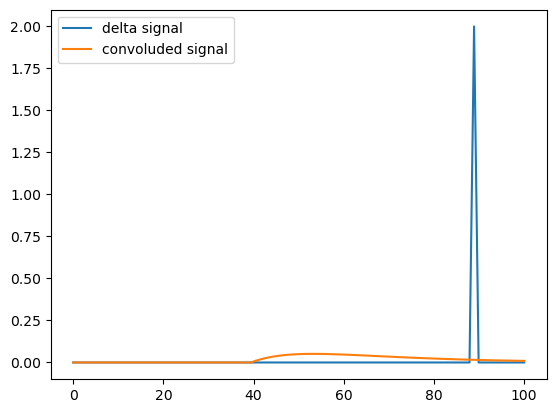

In [102]:
waveform = charge*delta_dirac(t, t[88])
wvf = np.convolve(waveform, sipm_response_1pe(t), mode='same') / np.sum(sipm_response_1pe(t))

plt.plot(t,waveform, label = 'delta signal')
plt.plot(t,wvf, label = 'convoluded signal')

plt.legend()

In [74]:
np.trapz(t, sipm_response_1pe(t))

-0.9412269034552482

In [82]:
charge, time

(array([2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1,
        2, 0, 1, 1, 3, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 3, 0, 0, 1, 1, 0, 1,
        0, 2, 0, 4, 2, 0, 4, 2, 1, 0, 0, 3, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0,
        3, 1, 1, 0, 1, 1, 2, 4, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1,
        1, 1, 0, 1, 3, 1, 2, 0, 1, 0, 1, 1]),
 array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
          4.04040404,   5.05050505,   6.06060606,   7.07070707,
          8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
         12.12121212,  13.13131313,  14.14141414,  15.15151515,
         16.16161616,  17.17171717,  18.18181818,  19.19191919,
         20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
         24.24242424,  25.25252525,  26.26262626,  27.27272727,
         28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
         32.32323232,  33.33333333,  34.34343434,  35.35353535,
         36.36363636,  37.37373737,  38.38383838,  39.39393939,
         40.404040

In [28]:
bins

array([0.14195867, 0.14200042, 0.14204216, ..., 0.97685307, 0.97689482,
       0.97693657])

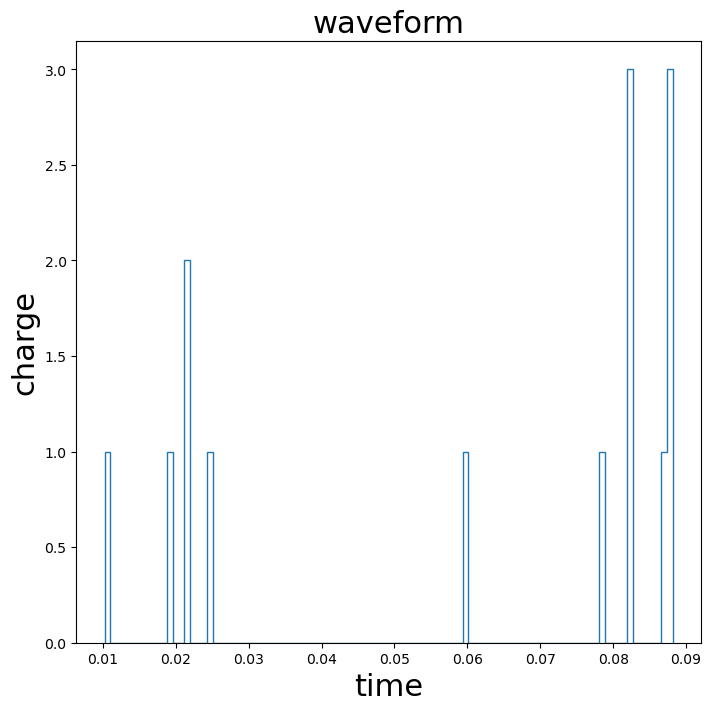

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(7, 7), constrained_layout=True)

font_size = 22
n_bins = 100

events, bins, bars = ax.hist(time, n_bins,
                             weights = charge,
                             density=False,
                             label='Waverform',
                             histtype='step')


ax.set_title('waveform', fontsize = font_size)
ax.set_ylabel('charge', fontsize = font_size)
ax.set_xlabel('time', fontsize = font_size);

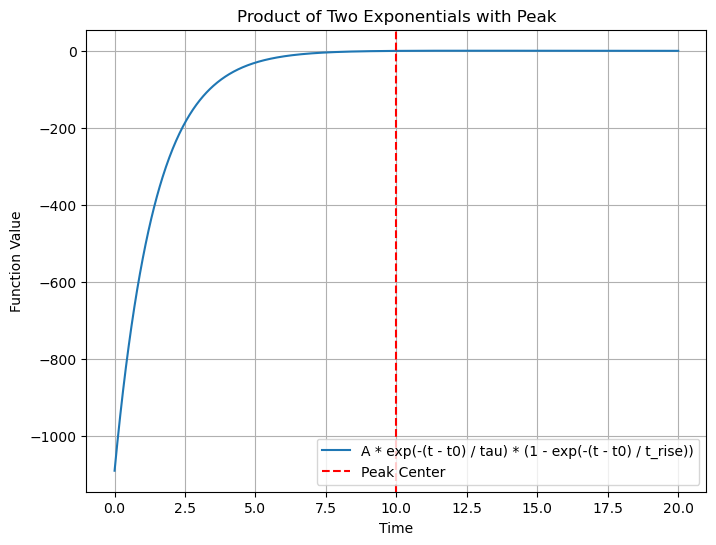

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 1.0  # Amplitude or peak value
t_rise = 2.0  # Rise time
tau = 5.0  # Decay time
t0 = 10.0  # Center of the peak

# Define the function
def exponential_product(t):
    return A * np.exp(-(t - t0) / tau) * (1 - np.exp(-(t - t0) / t_rise))

# Generate time values
t = np.linspace(0, 20, 1000)  # Time range from 0 to 20 with 1000 points

# Calculate the function values
y = exponential_product(t)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(t, y, label='A * exp(-(t - t0) / tau) * (1 - exp(-(t - t0) / t_rise))')
plt.axvline(x=t0, color='r', linestyle='--', label='Peak Center')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.title('Product of Two Exponentials with Peak')
plt.legend()
plt.grid(True)
plt.show()

